In [135]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
import warnings

In [136]:
warnings.filterwarnings('ignore')

In [137]:
data = pd.read_csv('tmdb_5000_movies.csv')
data2 = pd.read_csv('tmdb_5000_credits.csv')
data.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800


In [138]:
data['profit'] = (data.revenue - data.budget)

In [139]:
data.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,profit
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,2550965087


In [140]:
data2.head(2)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [141]:
columns = data.columns.to_list()
good_list = columns[8:9] + columns[11:12] + columns[13:14] + columns[-4:-2] + columns[-1:]
new_data = data[good_list]

In [142]:
new_data.head(3)

,popularity,release_date,runtime,title,vote_average,profit
0,150.437577,2009-12-10,162.0,Avatar,7.2,2550965087
1,139.082615,2007-05-19,169.0,Pirates of the Caribbean: At World's End,6.9,661000000
2,107.376788,2015-10-26,148.0,Spectre,6.3,635674609


In [143]:
new_data.dtypes

popularity      float64
release_date     object
runtime         float64
title            object
vote_average    float64
profit            int64
dtype: object

In [144]:
new_data.index = new_data.title
new_data.drop('title', axis=1, inplace=True)

In [145]:
new_data.head(3)

,popularity,release_date,runtime,vote_average,profit
title,,,,,
Avatar,150.437577,2009-12-10,162.0,7.2,2550965087
Pirates of the Caribbean: At World's End,139.082615,2007-05-19,169.0,6.9,661000000
Spectre,107.376788,2015-10-26,148.0,6.3,635674609


In [146]:
new_data['release_date'] = pd.to_datetime(new_data['release_date'])

In [147]:
#split = new_data.release_date.str.split('-')
#new_data.release_date = split.str.get(0)

In [148]:
new_data.release_date.value_counts()

release_date
2006-01-01    10
2002-01-01     8
2004-09-03     7
1999-10-22     7
2013-07-18     7
              ..
2002-12-30     1
2002-08-20     1
1987-11-05     1
2004-11-11     1
2012-05-03     1
Name: count, Length: 3280, dtype: int64

In [149]:
new_data.release_date.unique()

<DatetimeArray>
['2009-12-10 00:00:00', '2007-05-19 00:00:00', '2015-10-26 00:00:00',
 '2012-07-16 00:00:00', '2012-03-07 00:00:00', '2007-05-01 00:00:00',
 '2010-11-24 00:00:00', '2015-04-22 00:00:00', '2009-07-07 00:00:00',
 '2016-03-23 00:00:00',
 ...
 '1972-03-12 00:00:00', '2004-04-11 00:00:00', '2012-01-20 00:00:00',
 '1995-09-09 00:00:00', '2004-10-08 00:00:00', '2005-03-12 00:00:00',
 '1992-09-04 00:00:00', '2011-12-26 00:00:00', '2013-10-13 00:00:00',
 '2012-05-03 00:00:00']
Length: 3281, dtype: datetime64[ns]

In [150]:
new_data.isna().sum()

popularity      0
release_date    1
runtime         2
vote_average    0
profit          0
dtype: int64

In [151]:
new_data.dropna(subset=['release_date', 'runtime'], inplace=True)

In [152]:
new_data.isna().sum()

popularity      0
release_date    0
runtime         0
vote_average    0
profit          0
dtype: int64

In [153]:
new_data.release_date = new_data.release_date.astype('int64')

In [154]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4800 entries, Avatar to My Date with Drew
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   popularity    4800 non-null   float64
 1   release_date  4800 non-null   int64  
 2   runtime       4800 non-null   float64
 3   vote_average  4800 non-null   float64
 4   profit        4800 non-null   int64  
dtypes: float64(3), int64(2)
memory usage: 225.0+ KB


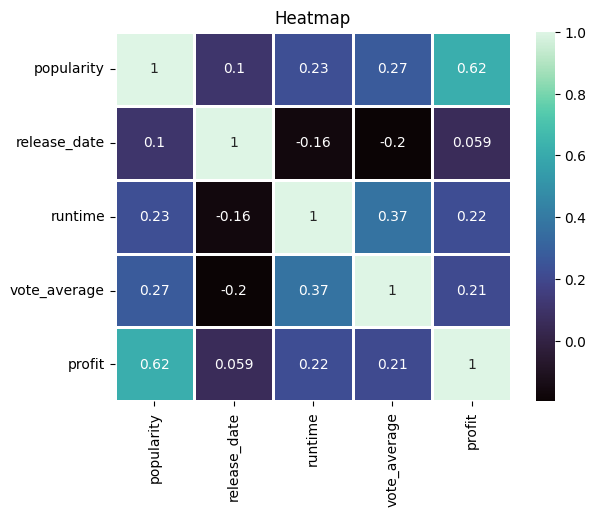

<Figure size 640x480 with 0 Axes>

In [155]:
sns.heatmap(new_data.corr(), annot=True, cmap='mako', linewidths=2, linecolor='white')
plt.title('Heatmap')
plt.show()
plt.clf()

In [156]:
new_data.dropna(inplace=True)

In [157]:
X = new_data[['popularity', 'release_date', 'runtime', 'profit']]
y = new_data['vote_average']

In [158]:
X.tail()

,popularity,release_date,runtime,profit
title,,,,
El Mariachi,14.269792,715564800000000000,81.0,1820920
Newlyweds,0.642552,1324857600000000000,85.0,-9000
"Signed, Sealed, Delivered",1.444476,1381622400000000000,120.0,0
Shanghai Calling,0.857008,1336003200000000000,98.0,0
My Date with Drew,1.929883,1123200000000000000,90.0,0


In [159]:
y.tail()

title
El Mariachi                  6.6
Newlyweds                    5.9
Signed, Sealed, Delivered    7.0
Shanghai Calling             5.7
My Date with Drew            6.3
Name: vote_average, dtype: float64

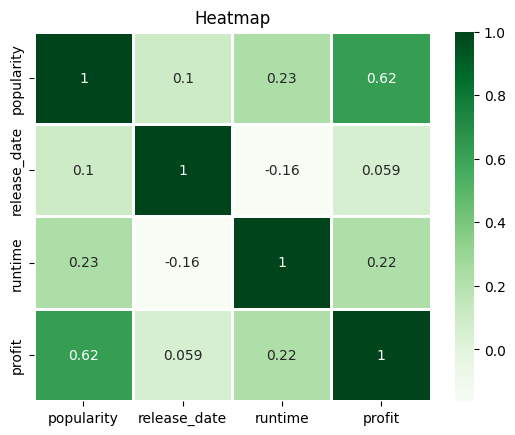

<Figure size 640x480 with 0 Axes>

In [160]:
sns.heatmap(X.corr(), annot=True, cmap='Greens', linewidths=2, linecolor='white')
plt.title('Heatmap')
plt.show()
plt.clf() 

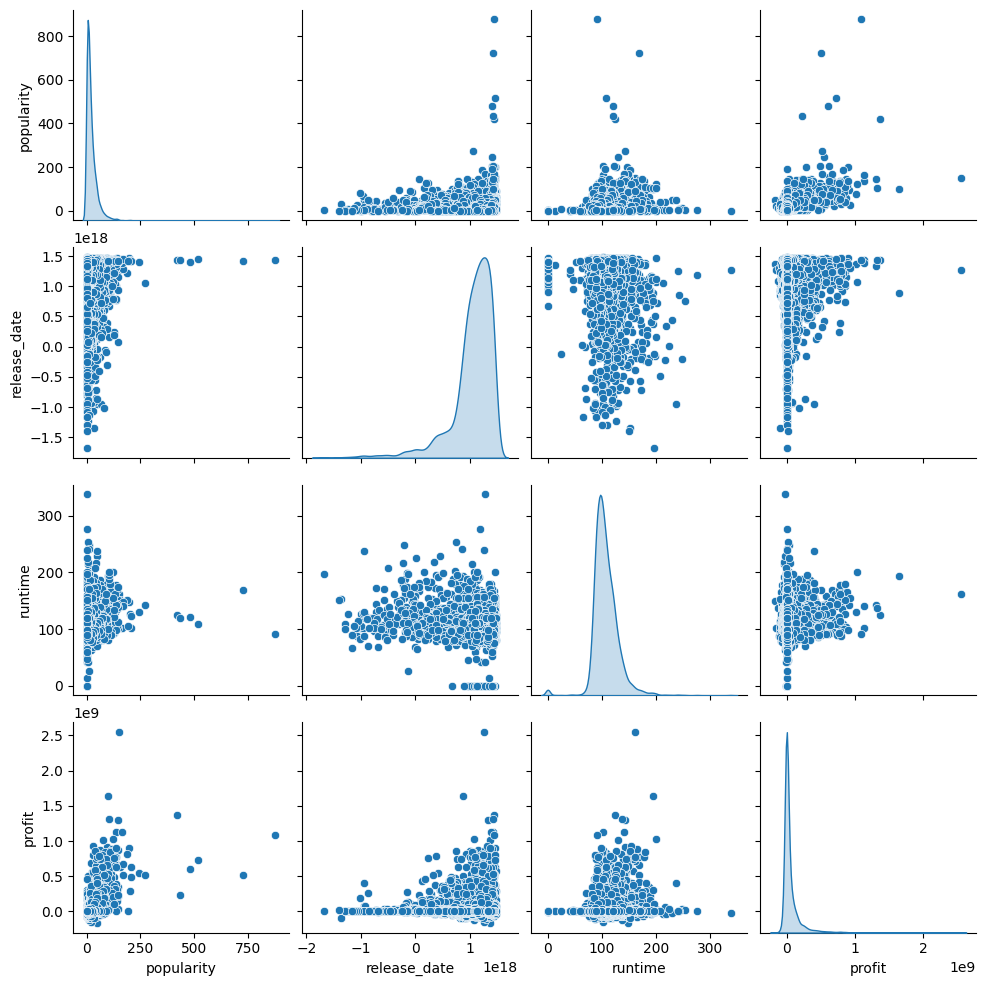

<Figure size 640x480 with 0 Axes>

In [161]:
sns.pairplot(X, diag_kind='kde')
plt.show()
plt.clf()

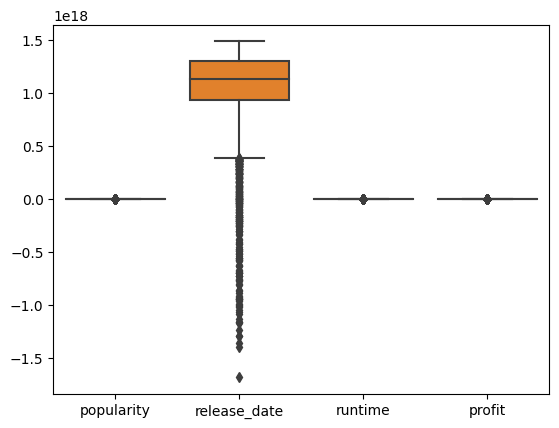

<Figure size 640x480 with 0 Axes>

In [162]:
sns.boxplot(X)
plt.show()
plt.clf()

In [163]:
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)

In [164]:
predictors = X

In [165]:
predictors, y

(array([[1.71814163e-01, 9.28783706e-01, 4.79289941e-01, 1.00000000e+00],
        [1.58845673e-01, 9.03263626e-01, 5.00000000e-01, 3.04309509e-01],
        [1.22634484e-01, 9.87294490e-01, 4.37869822e-01, 2.94987309e-01],
        ...,
        [1.64930956e-03, 9.67036562e-01, 3.55029586e-01, 6.09973881e-02],
        [9.78363013e-04, 9.52640619e-01, 2.89940828e-01, 6.09973881e-02],
        [2.20369235e-03, 8.85486817e-01, 2.66272189e-01, 6.09973881e-02]]),
 title
 Avatar                                      7.2
 Pirates of the Caribbean: At World's End    6.9
 Spectre                                     6.3
 The Dark Knight Rises                       7.6
 John Carter                                 6.1
                                            ... 
 El Mariachi                                 6.6
 Newlyweds                                   5.9
 Signed, Sealed, Delivered                   7.0
 Shanghai Calling                            5.7
 My Date with Drew                          

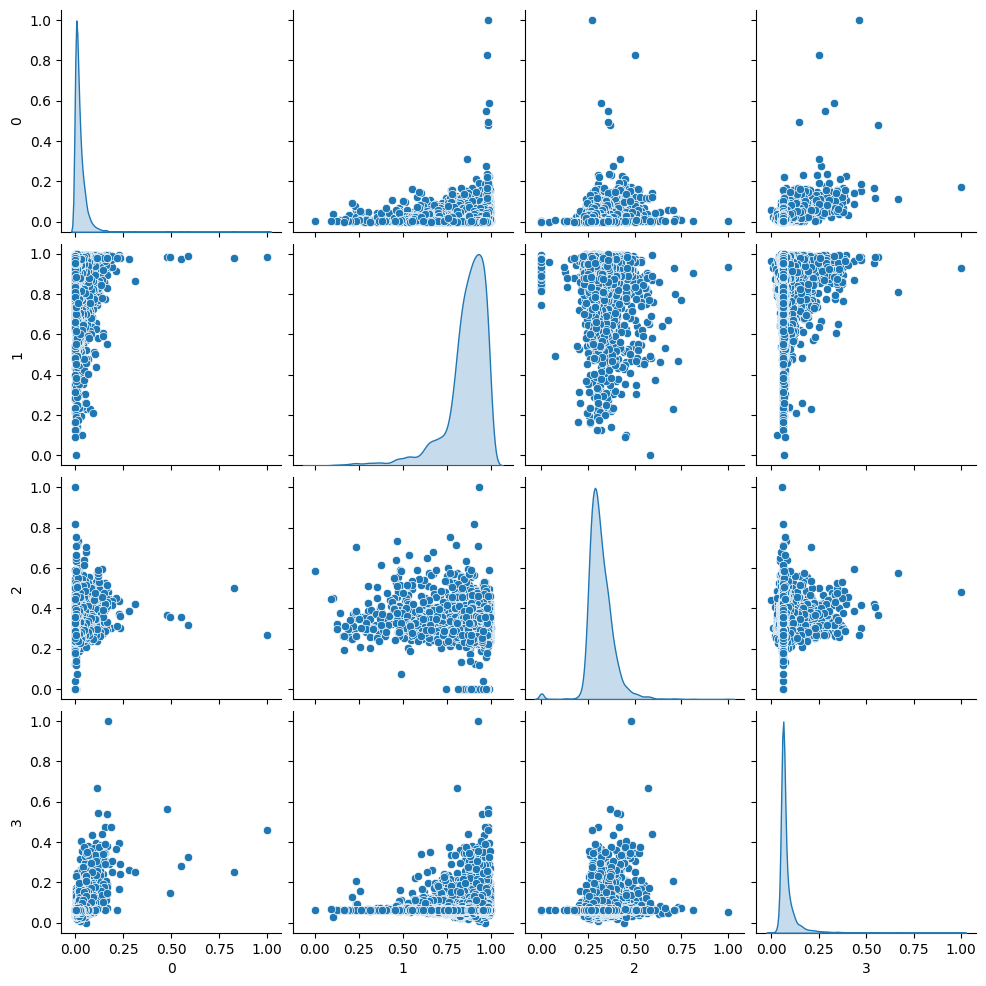

<Figure size 640x480 with 0 Axes>

In [166]:
sns.pairplot(pd.DataFrame(predictors), diag_kind='kde')
plt.show()
plt.clf()

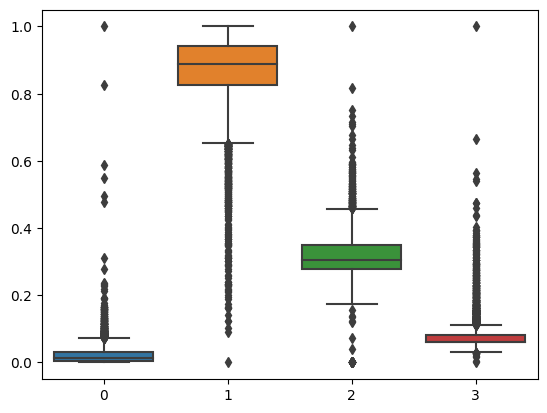

<Figure size 640x480 with 0 Axes>

In [167]:
sns.boxplot(pd.DataFrame(predictors))
plt.show()
plt.clf()

In [168]:
y = np.array(y)
pred_rate = y

In [169]:
X_train, X_test, y_train, y_test = train_test_split(predictors, pred_rate, test_size=0.20, random_state=50)

In [170]:
regressor = KNeighborsRegressor(n_neighbors=15, weights='uniform')
model = regressor.fit(X_train, y_train)

In [171]:
model.predict([[9.78363013e-04, 9.52640619e-01, 2.89940828e-01, 6.09973881e-02],
        [2.20369235e-03, 8.85486817e-01, 2.66272189e-01, 6.09973881e-02]])

array([5.5       , 5.35333333])

In [172]:
y_pred = model.predict(X_test)

In [173]:
scores_and_k = []
accuracies = []
for k in range(1, 100):
  regressor = KNeighborsRegressor(n_neighbors = k)
  regressor.fit(X_train, y_train)
  a = regressor.score(X_test, y_test)
  print(f'Accuracy: {a}')
  scores_and_k.append([a, k])
  accuracies.append(a)
print(f'Max Accuracy: {max(scores_and_k)[0]}, number of neighbors: {max(scores_and_k)[1]}')


Accuracy: -0.17876460548478001
Accuracy: 0.03519813829029428
Accuracy: 0.17068135868043144
Accuracy: 0.19460709209180171
Accuracy: 0.246529462542722
Accuracy: 0.28715941824156477
Accuracy: 0.2967063800692532
Accuracy: 0.2961122327147311
Accuracy: 0.306184558835189
Accuracy: 0.3029886274319181
Accuracy: 0.313181151114195
Accuracy: 0.32296915830702677
Accuracy: 0.3179362435302633
Accuracy: 0.32421654806030764
Accuracy: 0.3272134424437704
Accuracy: 0.31891525668722465
Accuracy: 0.31586695009428467
Accuracy: 0.30929882280176746
Accuracy: 0.3094809634951148
Accuracy: 0.3146714255549383
Accuracy: 0.3089607447604332
Accuracy: 0.31039782053847487
Accuracy: 0.3097330595178577
Accuracy: 0.3085081377535417
Accuracy: 0.30155325603097416
Accuracy: 0.2979265304539481
Accuracy: 0.29820971614252134
Accuracy: 0.2948460013141596
Accuracy: 0.2951760517694785
Accuracy: 0.29541919817086104
Accuracy: 0.2961158838338068
Accuracy: 0.2944166488338711
Accuracy: 0.2926433744128273
Accuracy: 0.2948862529741004
Ac

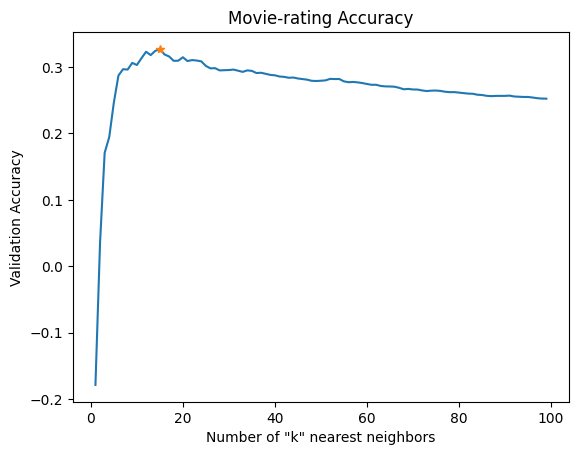

<Figure size 640x480 with 0 Axes>

In [174]:
k_list = list(range(1, 100))
sns.lineplot(x=k_list, y=accuracies)
plt.xlabel('Number of "k" nearest neighbors')
plt.ylabel('Validation Accuracy')
plt.title('Movie-rating Accuracy')
plt.plot(max(scores_and_k)[1], max(scores_and_k)[0], '-*')
plt.show()
plt.clf()